In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Try to import seaborn as a style
try:
  import seaborn as sns
  sns.set_style('whitegrid')
except ImportError:
  # If seaborn is not installed, use default matplotlib style
  plt.style.use('seaborn-whitegrid')
  

In [3]:
data= pd.read_csv("new_listingsData.csv")
data

,Unnamed: 0,price,host_location,host_since
0,0,445.55,"Westport, Ireland",2009-10-02
1,1,141.55,"Dublin, Ireland",2009-11-29
2,2,85.50,"County Clare, Ireland",2010-07-06
3,3,128.25,"Galway, Ireland",2010-07-19
4,4,79.80,Ireland,2010-07-27
...,...,...,...,...
20404,28487,38.00,"Louth, Ireland",2016-06-02
20405,28488,196.65,"Dublin, Ireland",2023-09-04
20406,28489,1064.00,"Leitrim Village, Ireland",2023-04-29
20407,28491,416.10,"Blackrock, Ireland",2017-07-25


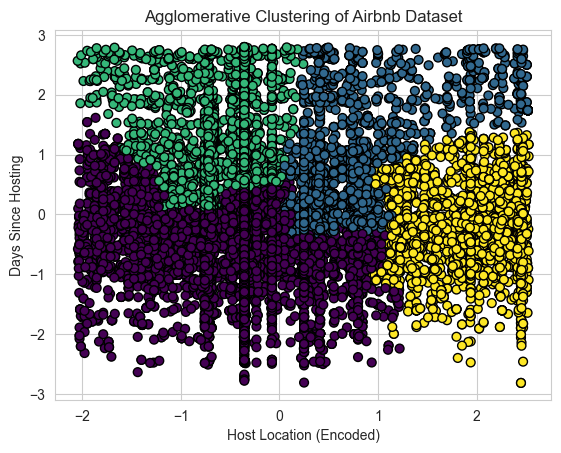

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your Airbnb dataset
# Assuming 'your_dataset.csv' is the name of your Airbnb dataset file
df = pd.read_csv('new_listingsData.csv')

# Assuming 'host_location' is a categorical variable
# Convert it to numerical using Label Encoding
le = LabelEncoder()
df['host_location_encoded'] = le.fit_transform(df['host_location'])

# Assuming 'host_since' is a date-like variable
# Convert it to the number of days since the earliest date
df['host_since'] = pd.to_datetime(df['host_since'])
df['days_since_hosting'] = (df['host_since'] - df['host_since'].min()).dt.days

# Select relevant features
X = df[['host_location_encoded', 'days_since_hosting']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create Agglomerative Clustering model
cluster_model = AgglomerativeClustering(n_clusters=4)  # You can adjust the number of clusters as needed

# Get the cluster labels
cluster_labels = cluster_model.fit_predict(X_scaled)

# Visualize the clusters (scatter plot)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=40)
plt.title('Agglomerative Clustering of Airbnb Dataset')
plt.xlabel('Host Location (Encoded)')
plt.ylabel('Days Since Hosting')
plt.show()


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assuming 'price' is your target variable
y = df['price']

# Select relevant features
X = df[['host_location_encoded', 'days_since_hosting']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on the test set: {mae}')


Mean Absolute Error on the test set: 131.70578543135767
